In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io

         T      I    P    q
0     28.9  130.0  1.5  1.5
1     29.0  130.0  1.5  1.5
2     29.1  130.0  1.5  1.5
3     47.2  132.0  1.5  1.5
4     45.7  132.0  1.5  1.5
...    ...    ...  ...  ...
1495  54.2  134.0  5.0  5.0
1496  54.2  135.0  5.0  5.0
1497  54.0  135.0  5.0  5.0
1498  54.1  135.0  5.0  5.0
1499  53.9  134.0  5.0  5.0

[1500 rows x 4 columns]
[[ 28.9 130.    1.5   1.5]
 [ 29.  130.    1.5   1.5]
 [ 29.1 130.    1.5   1.5]
 ...
 [ 54.  135.    5.    5. ]
 [ 54.1 135.    5.    5. ]
 [ 53.9 134.    5.    5. ]]


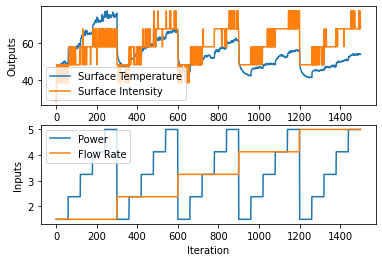

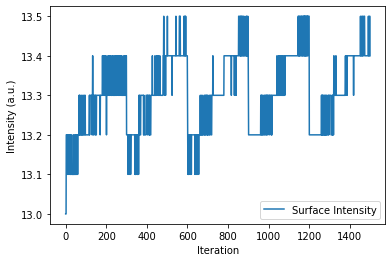

In [2]:
## load data
# 2020 data
data = pd.read_csv('2020_12_07_17h05m08s_systemIdentOutputs.csv')
print(data)
data = data.to_numpy()
print(data)

# scale I to Ts range
Imin = np.min(data[:,1])
Imax = np.max(data[:,1])
Tmin = np.min(data[:,0])
Tmax = np.max(data[:,0])
Idata = (data[:,1] - Imin)/(Imax-Imin) # normalize to [0, 1]
Idata = Idata*(Tmax-Tmin) + Tmin # scale to Ts range

# plot to visualize data
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(data[:,0], label='Surface Temperature')
ax.plot(Idata, label='Surface Intensity')
ax.set_xlabel('Iteration')
ax.set_ylabel('Outputs')
# ax.set_title('Outputs')
ax.legend()
ax = fig.add_subplot(212)
ax.plot(data[:,2], label='Power')
ax.plot(data[:,3], label='Flow Rate')
ax.set_xlabel('Iteration')
ax.set_ylabel('Inputs')
# ax.set_title('Inputs')
ax.legend()
plt.show()

data[:,1] = data[:,1]/10
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data[:,1], label='Surface Intensity')
ax.set_xlabel('Iteration')
ax.set_ylabel('Intensity (a.u.)')
ax.legend()
plt.show()

In [3]:
## load system matrices from Data model ID
model = io.loadmat('APPJmodel_2020_12_07_17h05m08s.mat') # 2020 data
A = model['A']
B = model['B']
C = model['C']
xss = np.ravel(model['yss']) # [Ts; I] # 2020 data
uss = np.ravel(model['uss']) # [P; q] # 2020 data
print('Linear Model to be used for CONTROL:')
print('A: ', A)
print('B: ', B)
print('C: ', C)
print('xss: ', xss)
print('uss: ', uss)

Linear Model to be used for CONTROL:
A:  [[ 8.12976017e-01 -5.95533507e+01]
 [-2.01887005e-03  3.05244310e-01]]
B:  [[5.60619377 0.57698521]
 [0.06390252 0.00755092]]
C:  [[1 0]
 [0 1]]
xss:  [45.381      13.15787295]
uss:  [1.5 1.5]


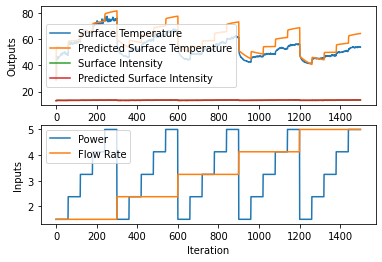

In [4]:
Nsim = len(data[:,0])-1
Ypred = np.zeros_like(data[:,:2])
Ypred[0,:] = np.ravel(data[0,:2]-xss)
for k in range(Nsim):
    x = Ypred[k,:].reshape(-1,1)
    u = data[k,2:].reshape(-1,1)

    Ypred[k+1,:] = np.ravel(A@x+B@u)
    
    
# plot to visualize data
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(data[:,0], label='Surface Temperature')
ax.plot(Ypred[:,0]+xss[0], label='Predicted Surface Temperature')
ax.plot(data[:,1], label='Surface Intensity')
ax.plot(Ypred[:,1]+xss[1], label='Predicted Surface Intensity')
ax.set_xlabel('Iteration')
ax.set_ylabel('Outputs')
# ax.set_title('Outputs')
ax.legend()
ax = fig.add_subplot(212)
ax.plot(data[:,2], label='Power')
ax.plot(data[:,3], label='Flow Rate')
ax.set_xlabel('Iteration')
ax.set_ylabel('Inputs')
# ax.set_title('Inputs')
ax.legend()
plt.show()

      Ts (degC)      I (a.u.)  P (W)  q (slm)
0         33.65  9.373740e+05    1.5      3.5
1         33.62  6.896790e+05    1.5      3.5
2         33.43  6.303913e+05    1.5      3.5
3         32.90  5.622200e+05    1.5      3.5
4         32.93  6.410619e+05    1.5      3.5
...         ...           ...    ...      ...
3835      51.86  1.471212e+06    4.5      3.0
3836      51.83  1.495386e+06    4.5      3.0
3837      51.97  1.491573e+06    4.5      3.0
3838      51.79  1.456939e+06    4.5      3.0
3839      51.83  1.453891e+06    4.5      3.0

[3840 rows x 4 columns]
[[3.36500000e+01 9.37373960e+05 1.50000000e+00 3.50000000e+00]
 [3.36200000e+01 6.89679007e+05 1.50000000e+00 3.50000000e+00]
 [3.34300000e+01 6.30391266e+05 1.50000000e+00 3.50000000e+00]
 ...
 [5.19700000e+01 1.49157266e+06 4.50000000e+00 3.00000000e+00]
 [5.17900000e+01 1.45693864e+06 4.50000000e+00 3.00000000e+00]
 [5.18300000e+01 1.45389139e+06 4.50000000e+00 3.00000000e+00]]


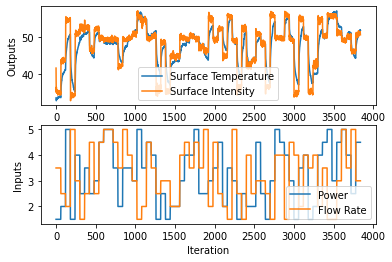

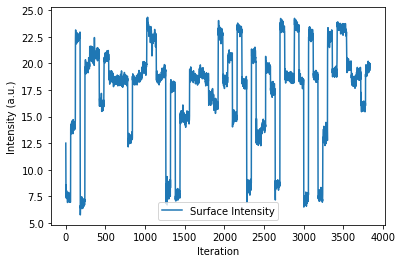

In [5]:
## load data
# 2021 data
data_2021 = pd.read_csv('2021_06_08_15h57m55s_dataCollectionOL.csv')
print(data_2021)
data_2021 = data_2021.to_numpy()
print(data_2021)

# scale I to Ts range
Imin = np.min(data_2021[:,1])
Imax = np.max(data_2021[:,1])
Tmin = np.min(data_2021[:,0])
Tmax = np.max(data_2021[:,0])
Idata = (data_2021[:,1] - Imin)/(Imax-Imin) # normalize to [0, 1]
Idata = Idata*(Tmax-Tmin) + Tmin # scale to Ts range

# plot to visualize data
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(data_2021[:,0], label='Surface Temperature')
ax.plot(Idata, label='Surface Intensity')
ax.set_xlabel('Iteration')
ax.set_ylabel('Outputs')
# ax.set_title('Outputs')
ax.legend()
ax = fig.add_subplot(212)
ax.plot(data_2021[:,2], label='Power')
ax.plot(data_2021[:,3], label='Flow Rate')
ax.set_xlabel('Iteration')
ax.set_ylabel('Inputs')
# ax.set_title('Inputs')
ax.legend()
plt.show()

data_2021[:,1] = data_2021[:,1]/0.75e5
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data_2021[:,1], label='Surface Intensity')
ax.set_xlabel('Iteration')
ax.set_ylabel('Intensity (a.u.)')
ax.legend()
plt.show()

In [6]:
## load system matrices from Data model ID
# model identified using ssest
model = io.loadmat('APPJmodel_2021_06_08_15h57m55s.mat') # 2021 data
Ap = model['A']
Bp = model['B']
Cp = model['C']
xssp = np.ravel(model['yss']) # [Ts; I] # 2021 data
ussp = np.ravel(model['uss']) # [P; q] # 2021 data
print('Linear Model to be used for the PLANT:')
print('A: ', Ap)
print('B: ', Bp)
print('C: ', Cp)

Linear Model to be used for the PLANT:
A:  [[ 1.37469544 -0.97638012]
 [ 0.48085311 -0.2367417 ]]
B:  [[ 2.06826679 -1.13621464]
 [ 2.57166558 -1.4110583 ]]
C:  [[1 0]
 [0 1]]


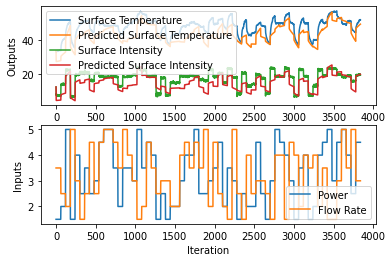

In [7]:
Nsim = len(data_2021[:,0])-1
Ypred = np.zeros_like(data_2021[:,:2])
Ypred[0,:] = np.ravel(data_2021[0,:2]-xssp)
for k in range(Nsim):
    x = Ypred[k,:].reshape(-1,1)
    u = data_2021[k,2:].reshape(-1,1)

    Ypred[k+1,:] = np.ravel(Ap@x+Bp@u)
    
    
# plot to visualize data
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(data_2021[:,0], label='Surface Temperature')
ax.plot(Ypred[:,0]+xssp[0], label='Predicted Surface Temperature')
ax.plot(data_2021[:,1], label='Surface Intensity')
ax.plot(Ypred[:,1]+xssp[1], label='Predicted Surface Intensity')
ax.set_xlabel('Iteration')
ax.set_ylabel('Outputs')
# ax.set_title('Outputs')
ax.legend()
ax = fig.add_subplot(212)
ax.plot(data_2021[:,2], label='Power')
ax.plot(data_2021[:,3], label='Flow Rate')
ax.set_xlabel('Iteration')
ax.set_ylabel('Inputs')
# ax.set_title('Inputs')
ax.legend()
plt.show()

In [8]:
## load system matrices from Data model ID
# model identified using n4sid
model = io.loadmat('APPJmodel_2021_06_08_15h57m55s_n4sid.mat') # 2021 data
Ap1 = model['A']
Bp1 = model['B']
Cp1 = model['C']
xssp1 = np.ravel(model['yss']) # [Ts; I] # 2021 data
ussp1 = np.ravel(model['uss']) # [P; q] # 2021 data
print('Linear Model to be used for the PLANT:')
print('A: ', Ap1)
print('B: ', Bp1)
print('C: ', Cp1)

Linear Model to be used for the PLANT:
A:  [[0.90268351 0.0175441 ]
 [0.13155243 0.24256854]]
B:  [[ 0.58145481 -0.22042118]
 [ 2.67365891 -1.13104991]]
C:  [[1 0]
 [0 1]]


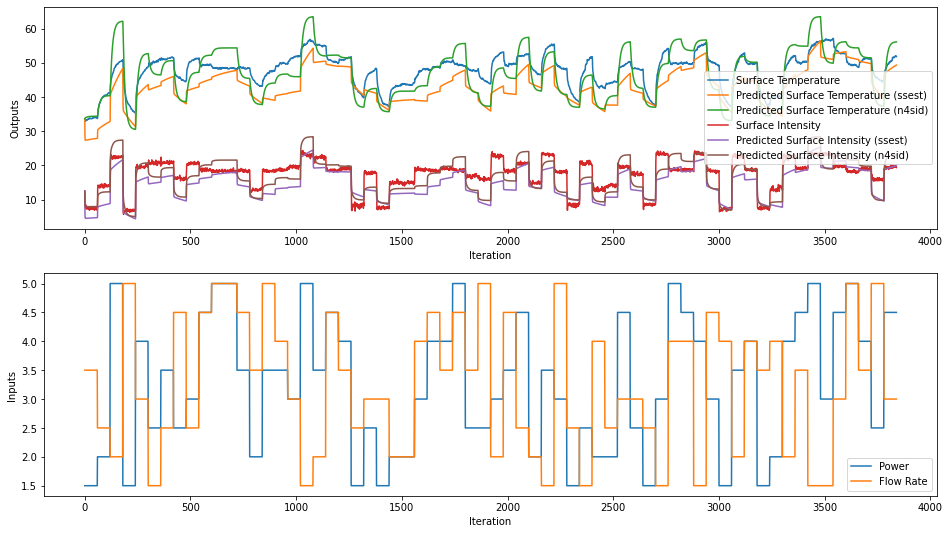

In [9]:
Nsim = len(data_2021[:,0])-1
Ypred1 = np.zeros_like(data_2021[:,:2])
Ypred1[0,:] = np.ravel(data_2021[0,:2]-xssp)
for k in range(Nsim):
    x = Ypred1[k,:].reshape(-1,1)
    u = data_2021[k,2:].reshape(-1,1)

    Ypred1[k+1,:] = np.ravel(Ap1@x+Bp1@u)
    
    
# plot to visualize data
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(211)
ax.plot(data_2021[:,0], label='Surface Temperature')
ax.plot(Ypred[:,0]+xssp[0], label='Predicted Surface Temperature (ssest)')
ax.plot(Ypred1[:,0]+xssp1[0], label='Predicted Surface Temperature (n4sid)')
ax.plot(data_2021[:,1], label='Surface Intensity')
ax.plot(Ypred[:,1]+xssp[1], label='Predicted Surface Intensity (ssest)')
ax.plot(Ypred1[:,1]+xssp1[1], label='Predicted Surface Intensity (n4sid)')
ax.set_xlabel('Iteration')
ax.set_ylabel('Outputs')
# ax.set_title('Outputs')
ax.legend()
ax = fig.add_subplot(212)
ax.plot(data_2021[:,2], label='Power')
ax.plot(data_2021[:,3], label='Flow Rate')
ax.set_xlabel('Iteration')
ax.set_ylabel('Inputs')
# ax.set_title('Inputs')
ax.legend()
plt.show()

In [10]:
## load system matrices from Data model ID
# model identified using n4sid all data
model = io.loadmat('APPJmodel_2021_06_08_15h57m55s_n4sid_alldata.mat') # 2021 data
Ap = model['A']
Bp = model['B']
Cp = model['C']
xssp = np.ravel(model['yss']) # [Ts; I] # 2021 data
ussp = np.ravel(model['uss']) # [P; q] # 2021 data
print('Linear Model to be used for the CONTROL:')
print('A: ', Ap)
print('B: ', Bp)
print('C: ', Cp)

Linear Model to be used for the CONTROL:
A:  [[0.90268351 0.0175441 ]
 [0.13155243 0.24256854]]
B:  [[ 0.58145481 -0.22042118]
 [ 2.67365891 -1.13104991]]
C:  [[1 0]
 [0 1]]


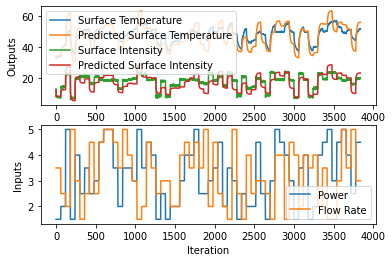

In [11]:
Nsim = len(data_2021[:,0])-1
Ypred = np.zeros_like(data_2021[:,:2])
Ypred[0,:] = np.ravel(data_2021[0,:2]-xssp)
for k in range(Nsim):
    x = Ypred[k,:].reshape(-1,1)
    u = data_2021[k,2:].reshape(-1,1)

    Ypred[k+1,:] = np.ravel(Ap@x+Bp@u)
    
    
# plot to visualize data
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(data_2021[:,0], label='Surface Temperature')
ax.plot(Ypred[:,0]+xssp[0], label='Predicted Surface Temperature')
ax.plot(data_2021[:,1], label='Surface Intensity')
ax.plot(Ypred[:,1]+xssp[1], label='Predicted Surface Intensity')
ax.set_xlabel('Iteration')
ax.set_ylabel('Outputs')
# ax.set_title('Outputs')
ax.legend()
ax = fig.add_subplot(212)
ax.plot(data_2021[:,2], label='Power')
ax.plot(data_2021[:,3], label='Flow Rate')
ax.set_xlabel('Iteration')
ax.set_ylabel('Inputs')
# ax.set_title('Inputs')
ax.legend()
plt.show()

In [12]:
## load system matrices from Data model ID
# model identified using n4sid 75/25 split validation data
model = io.loadmat('APPJmodel_2021_06_08_15h57m55s_n4sid_50split.mat') # 2021 data
Ap1 = model['A']
Bp1 = model['B']
Cp1 = model['C']
xssp1 = np.ravel(model['yss']) # [Ts; I] # 2021 data
ussp1 = np.ravel(model['uss']) # [P; q] # 2021 data
print('Linear Model to be used for the PLANT:')
print('A: ', Ap1)
print('B: ', Bp1)
print('C: ', Cp1)

Linear Model to be used for the PLANT:
A:  [[0.88754486 0.05459241]
 [0.09345649 0.28265964]]
B:  [[ 0.50282961 -0.17397488]
 [ 2.7636534  -1.03664163]]
C:  [[1 0]
 [0 1]]


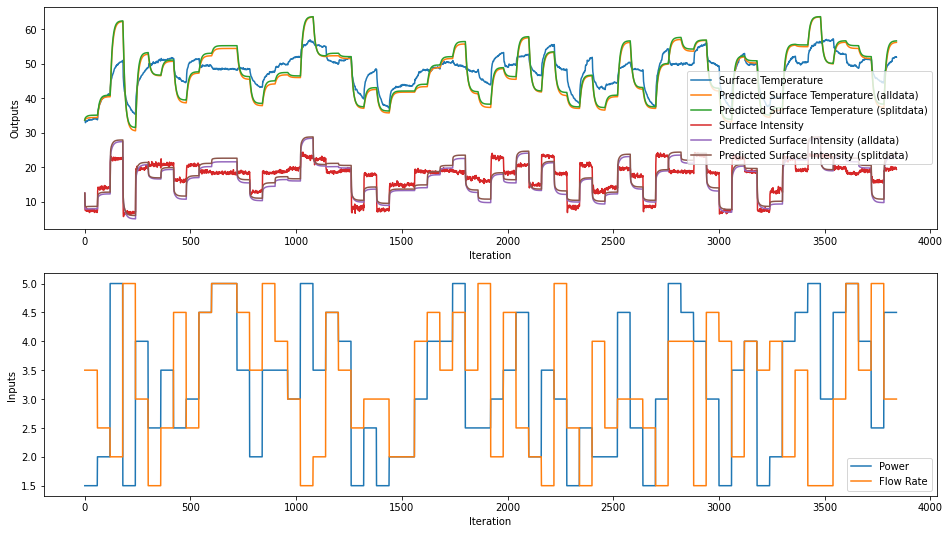

In [13]:
Nsim = len(data_2021[:,0])-1
Ypred1 = np.zeros_like(data_2021[:,:2])
Ypred1[0,:] = np.ravel(data_2021[0,:2]-xssp)
for k in range(Nsim):
    x = Ypred1[k,:].reshape(-1,1)
    u = data_2021[k,2:].reshape(-1,1)

    Ypred1[k+1,:] = np.ravel(Ap1@x+Bp1@u)
    
    
# plot to visualize data
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(211)
ax.plot(data_2021[:,0], label='Surface Temperature')
ax.plot(Ypred[:,0]+xssp[0], label='Predicted Surface Temperature (alldata)')
ax.plot(Ypred1[:,0]+xssp1[0], label='Predicted Surface Temperature (splitdata)')
ax.plot(data_2021[:,1], label='Surface Intensity')
ax.plot(Ypred[:,1]+xssp[1], label='Predicted Surface Intensity (alldata)')
ax.plot(Ypred1[:,1]+xssp1[1], label='Predicted Surface Intensity (splitdata)')
ax.set_xlabel('Iteration')
ax.set_ylabel('Outputs')
# ax.set_title('Outputs')
ax.legend()
ax = fig.add_subplot(212)
ax.plot(data_2021[:,2], label='Power')
ax.plot(data_2021[:,3], label='Flow Rate')
ax.set_xlabel('Iteration')
ax.set_ylabel('Inputs')
# ax.set_title('Inputs')
ax.legend()
plt.show()